# Multivariate Normal Distributions and Principal Components Analysis (PCA)

In this Jupyter Notebook we will see several demos, first of multivariate normal distributions and next of applications of PCA.

First of all, we load our packages as always

In [1]:
%matplotlib inline                           
# Allows us to view plots inline in the notebook
import numpy as np                       # For numerical computations
import matplotlib.pyplot as plt          # For plotting
import numpy.matlib
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

### Demo 1: Normal distributions with diagonal covariance matrices

We will empirically study the geometry of normal distributions by sampling and plotting data from multivariate distributions with mean at the origin, and various covariance matrices.

Let us start out with an example where we sample from distributions with covariance matrices 

Sigma1 $= \left(\begin{array}{cc} 10 & 0\\0 & 1 \end{array} \right)$
Sigma2 $= \left(\begin{array}{cc} 10 & 0\\0 & 10 \end{array} \right)$
Sigma3 $= \left(\begin{array}{cc} 10 & 0\\0 & 0 \end{array} \right)$

Text(0.5,1,'Covariance Sigma3')

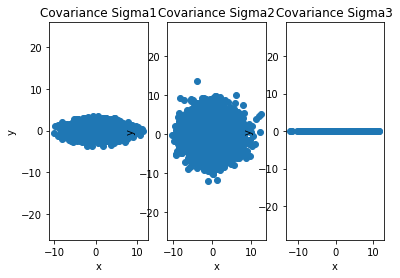

In [2]:
# Specify the mean and covariance matrix
Mean = [0,0]
Sigma1 = np.array([[10, 0], [0, 1]])
Sigma2 = np.array([[10, 0], [0, 10]])
Sigma3 = np.array([[10, 0], [0, 0]])

# Draw 5000 samples from each of the corresponding multivariate normal distributions
x1, y1 = np.random.multivariate_normal(Mean, Sigma1, 5000).T
x2, y2 = np.random.multivariate_normal(Mean, Sigma2, 5000).T
x3, y3 = np.random.multivariate_normal(Mean, Sigma3, 5000).T

fig, ax = plt.subplots(1,3)
ax[0].scatter(x1,y1)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].axis('equal')
ax[0].set_title('Covariance Sigma1')

ax[1].scatter(x2,y2)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].axis('equal')
ax[1].set_title('Covariance Sigma2')

ax[2].scatter(x3,y3)
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')
ax[2].axis('equal')
ax[2].set_title('Covariance Sigma3')

### Demo 2: Normal distribution with general covariance matrices

Now, let's try a different set of Sigmas:

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


Text(0.5,1,'Covariance Sigma6')

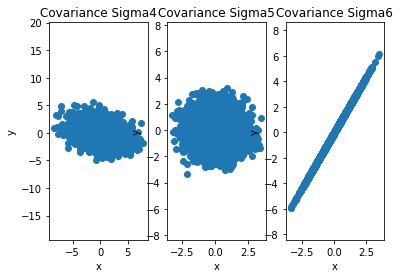

In [3]:
Sigma4 = np.array([[5, -1], [-1, 2]])
Sigma5 = [[1.0250, -0.0433], [-0.0433, 0.9750]]
Sigma6 = [[1.0000, 1.7321], [1.7321, 3.0000]]

# Draw 5000 samples from each of the corresponding multivariate normal distributions
x4, y4 = np.random.multivariate_normal(Mean, Sigma4, 5000).T
x5, y5 = np.random.multivariate_normal(Mean, Sigma5, 5000).T
x6, y6 = np.random.multivariate_normal(Mean, Sigma6, 5000).T

fig, ax = plt.subplots(1,3)
ax[0].scatter(x4,y4)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].axis('equal')
ax[0].set_title('Covariance Sigma4')

ax[1].scatter(x5,y5)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].axis('equal')
ax[1].set_title('Covariance Sigma5')

ax[2].scatter(x6,y6)
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')
ax[2].axis('equal')
ax[2].set_title('Covariance Sigma6')

What do you think is the cause of the different dataset shapes?

In [4]:
# Let's compute some eigenvalues
evals4, evecs4 = np.linalg.eigh(Sigma4)
print('Evals of Sigma4:', evals4)

evals5, evecs5 = np.linalg.eigh(Sigma5)
print('Evals of Sigma5:', evals5)

evals6, evecs6 = np.linalg.eigh(Sigma6)
print('Evals of Sigma6:', evals6)

Evals of Sigma4: [1.69722436 5.30277564]
Evals of Sigma5: [0.9500011 1.0499989]
Evals of Sigma6: [-4.26020463e-05  4.00004260e+00]


We see that for Sigma6, $\lambda_1 = 4$ while $\lambda_2 = 0$. When the eigenvalues are not all positive (non-zero), the covariance matrix is not *positive definite*, and the data lives on a lower-dimensional linear subspace.

Note that all these examples correspond to examples that we saw above for diagonal covariance matrices -- only with those matrices, we could only represent datasets whose orientations were along the vector space axes.

**But the eigenvalue decomposition gives us more than dataset shape!**

Let us return to the covariance matrix Sigma4 and plot the dataset together with the two eigenvectors

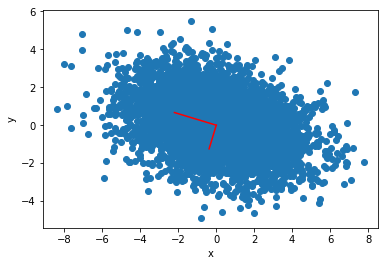

In [5]:
# Plot the sampled points
plt.scatter(x4, y4)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')

# Compute the standard deviations corresponding to the eigenvalues. 
# Recall that the eigenvalues are sorted in ascending order
s0 = np.sqrt(evals4[1])
s1 = np.sqrt(evals4[0])

plt.plot([0, s0*evecs4[0,1]], [0, s0*evecs4[1,1]], 'r')
plt.plot([0, s1*evecs4[0,0]], [0, s1*evecs4[1,0]], 'r')

In the above, we used a few facts for our visualization:
* The eigenvalue decomposition diagonalizes the covariance matrix. The diagonal matrix with eigenvalues along the diagonal is the covariance matrix in the basis given by the eigenvectors.
* We plotted the directions of the eigenvectors in red, and see that indeed, as when viewing diagonal covariance matrices in Case 1, these were parallel to the axes.
* In a diagonal covariance matrix, the diagonal elements are variances. The square root of a variance is a standard deviation, and the length of the two red vectors correspond, indeed, to the standard deviations of the dataset projected onto those subspaces
* The subspaces spanned by these eigenvectors of the covariance matrix are *principal components*


**NB!** In all the above, the data had mean 0. Now, when you compute covariance using the covariance formula, the mean is automatically deducted. But when you start plotting eigenvectors, they are not. Thus, if your data is not centered, your eigenvectors need to start at the mean. Also, if you are computing the covariance via formulas like $\mathbf{X^TX}$, then you absolutely need to center your data first. If you are in doubt, center your data. It will almost never hurt!

### Interlude: The dataset we will be using today

**In today's example we will study and visualize variation in diatom shape**. We start by loading the dataset found in the file 'diatoms.txt', which contains a set of *diatom* outlines. A diatom is a type of algae, whose species is strongly correlated with its outline shape; in the following, we will be using these outlines as a descriptive feature of the diatom.

The file 'diatoms.txt' contains 780 diatoms described by 90 successive "landmark points" (x_i, y_i) along the outline, recorded as (x_0, y_0, x_1, y_1, ..., x_89, y_89).

The file 'diatoms_classes.txt' contains one class assignment per diatom, into species classified by the integers 1-37.

In [6]:
diatoms = np.loadtxt('diatoms.txt', delimiter=',').T
diatoms_classes = np.loadtxt('diatoms_classes.txt', delimiter=',')
print('Shape of diatoms:', diatoms.shape)
print('Shape of diatoms_classes:', diatoms_classes.shape)
#print('Classes:', diatoms_classes)

d,N = diatoms.shape
print('Dimension:', d)
print('Sample size:', N)

Shape of diatoms: (180, 780)
Shape of diatoms_classes: (780,)
Dimension: 180
Sample size: 780


Here's a function that will plot a given diatom. Let's try it on the first diatom in the dataset.

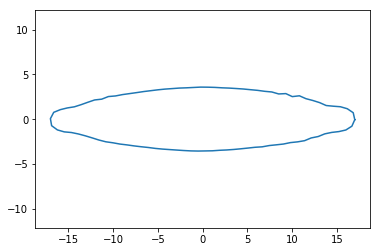

In [7]:
def plot_diatom(diatom):
    xs = np.zeros(91)
    ys = np.zeros(91)
    for i in range(90):
        xs[i] = diatom[2*i]
        ys[i] = diatom[2*i+1]
    
    # Loop around to first landmark point to get a connected shape
    xs[90] = xs[0]
    ys[90] = ys[0]
    
    plt.plot(xs, ys)    
    plt.axis('equal')   

plot_diatom(diatoms[:,0])

Let's next compute the mean diatom and plot it.

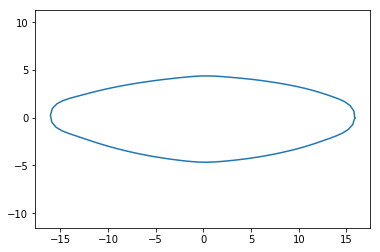

In [8]:
mean_diatom = np.mean(diatoms, 1)
plot_diatom(mean_diatom)

### Demo 3: Implementing PCA and using it for a 2-dimensional visualization of the face data

First, we implement PCA following the algorithm from the lecture, and apply it to the face dataset:

In [26]:
def pca(data):
    # Extract data dimensions
    d, N = data.shape
    # First, center the data
    center = np.mean(data, 1)
    centers = np.matlib.repmat(center, N, 1)
    data_cent = data - np.transpose(centers)
    
    # Compute covariance and its eigenvalues from centered data
    Sigma = np.cov(data_cent)
    evals, evecs = np.linalg.eigh(Sigma)
    
    # Return eigenvalues and eigenvectors and -- for the sake of the lecture -- also the centered data
    return np.flip(evals,0), np.flip(evecs, 1), data_cent

PCevals, PCevecs, data_cent = pca(diatoms)
# PCevals is a vector of eigenvalues in decreasing order. To verify, uncomment:
# print(PCevals)
# PCevecs is a matrix whose columns are the eigenvectors listed in the order of decreasing eigenvectors

***Recall:***
* The eigenvalues represent the variance of the data projected to the corresponding eigenvectors. 
* Thus, the 2D linear subspace with highest projected variance is spanned by the eigenvectors corresponding to the two largest eigenvalues.
* We extract these eigenvectors and plot the data projected onto the corresponding space.

(180,)
(180, 780)
(780,)
(780,)


Text(0,0.5,'Species classification')

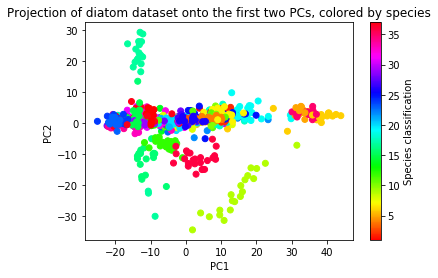

In [27]:
PC1 = PCevecs[:,0]
PC2 = PCevecs[:,1]
print(PC1.shape)
print(data_cent.shape)
PC1projs = np.matmul(data_cent.T,PC1)
PC2projs = np.matmul(data_cent.T,PC2)
print(PC1projs.shape)
print(diatoms_classes.shape)
plt.scatter(PC1projs, PC2projs, c=diatoms_classes, cmap='hsv')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of diatom dataset onto the first two PCs, colored by species')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Species classification')

### Demo 4: Analyzing quality of dimensionality reduction through the variance captured by the components

Proportion of variance explained by the first 1 principal components: 0.7718721493017529
Proportion of variance explained by the first 2 principal components: 0.9276996293043025
Proportion of variance explained by the first 3 principal components: 0.9521198453942007
Proportion of variance explained by the first 4 principal components: 0.9637878603999529
Proportion of variance explained by the first 5 principal components: 0.9739084497954094
Proportion of variance explained by the first 6 principal components: 0.98236065164916
Proportion of variance explained by the first 7 principal components: 0.9889975933245944
Proportion of variance explained by the first 8 principal components: 0.9910287023941854
Proportion of variance explained by the first 9 principal components: 0.9926692113360289
Proportion of variance explained by the first 10 principal components: 0.9939926229665051


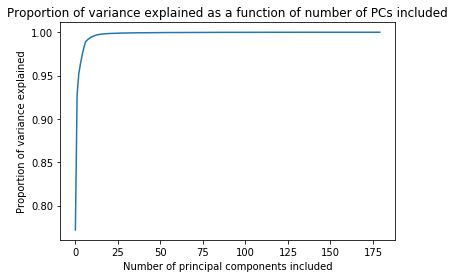

In [11]:
variance_explained_per_component = PCevals/np.sum(PCevals)
cumulative_variance_explained = np.cumsum(variance_explained_per_component)

plt.plot(cumulative_variance_explained)
plt.xlabel('Number of principal components included')
plt.ylabel('Proportion of variance explained')
plt.title('Proportion of variance explained as a function of number of PCs included')

# Let's print out the proportion of variance explained by the first 10 PCs
for i in range(10):
    print('Proportion of variance explained by the first '+str(i+1)+' principal components:', cumulative_variance_explained[i])

As you can see above, 92% of the variance is explained by the first two principal components; 95% by the first 3. With only 8 principal components (dimensions) we have already described more than 99% of the variance in the data. In other words, the intrinsic dimension of the dataset is far less than the 180 dimensions used to describe each diatom.

### Demo 5: What you need to remember, but might easily forget...

Recall that the PCevecs span the best-fitting subspaces for the *centered* data, so in order to use this subspace to actually approximate data, we need to add the mean diatom back on. To make this very clear, let's first plot a ''centered'' diatom *without* and *with* adding the mean back on

Text(0.5,1,'Plotting the same 0th diatom *plus* the mean diatom')

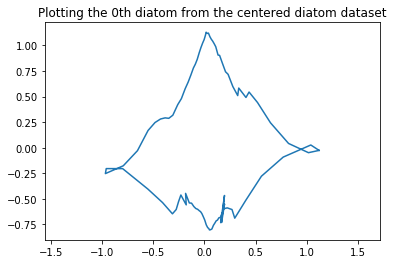

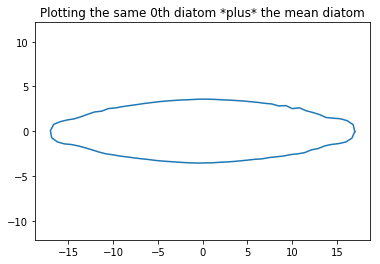

In [12]:
plt.figure()
plot_diatom(data_cent[:,0])
plt.title('Plotting the 0th ''diatom'' from the centered diatom dataset')
plt.figure()
plot_diatom(data_cent[:,0] + mean_diatom)
plt.title('Plotting the same 0th diatom *plus* the mean diatom')

### Demo 6: Visualizing variation captured by the PCs

Let's visualize what happens when we sample "diatoms" as we move along the first PC

(180,)
(180,)
(180,)
(180,)
(180,)
(180,)
(180,)


Text(0.5,1,'Diatom shape along PC1')

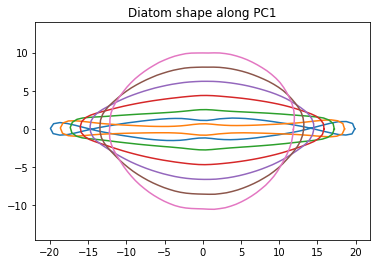

In [13]:
e1 = PCevecs[:,0]
lambda1 = PCevals[0]
std1 = np.sqrt(lambda1) # In case the naming std is confusing -- the eigenvalues have a statistical interpretation

diatoms_along_pc = np.zeros((7,180))
for i in range(7):
    diatoms_along_pc[i,:] = mean_diatom + (i-3)*std1*e1
    print(diatoms_along_pc[i,:].shape)
    
for i in range(7):
    plot_diatom(diatoms_along_pc[i])

plt.title('Diatom shape along PC1')

Now, let's look at the second PC

Text(0.5,1,'Diatom shape along PC2')

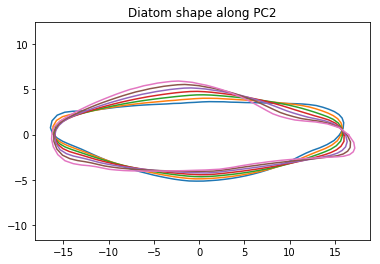

In [14]:
e2 = PCevecs[:,1]
lambda2 = PCevals[1]
std2 = np.sqrt(lambda2)

diatoms_along_pc = np.zeros((7,180))
for i in range(7):
    diatoms_along_pc[i,:] = mean_diatom + (i-2)*std2*e2
    
for i in range(7):
    plot_diatom(diatoms_along_pc[i])

plt.title('Diatom shape along PC2')

Text(0.5,1,'Diatom shape along PC3')

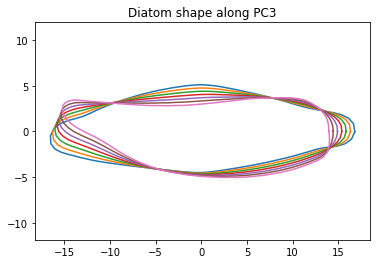

In [15]:
e3 = PCevecs[:,2]
lambda3 = PCevals[2]
std3 = np.sqrt(lambda3)

diatoms_along_pc = np.zeros((7,180))
for i in range(7):
    diatoms_along_pc[i,:] = mean_diatom + (i-2)*std3*e3
    
for i in range(7):
    plot_diatom(diatoms_along_pc[i])
    
plt.title('Diatom shape along PC3')

Text(0.5,1,'Diatom shape along PC4')

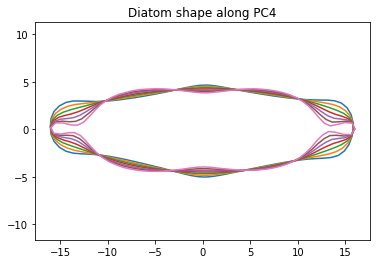

In [16]:
e4 = PCevecs[:,3]
lambda4 = PCevals[3]
std4 = np.sqrt(lambda4)

diatoms_along_pc = np.zeros((7,180))
for i in range(7):
    diatoms_along_pc[i,:] = mean_diatom + (i-2)*std4*e4
    
for i in range(7):
    plot_diatom(diatoms_along_pc[i])
    
plt.title('Diatom shape along PC4')